# Motivation

Study and analyse battery data sets to understand various factors influencing the performance of the batteries

# Overview of the Battery Datasets

In this project two battery data sets are taken into consideration namely:
    
**1. Kokam SLBP 52495**:
 - This battery can store a lot of enery compared to its size, offers a high performance with advantages like flexible shape, light weight & relative fast charging. Due to these properties it is used for applications involving th need of high power and compact design.
 
 
**2. LG Chem INR122170**:
- This battery due to its large capacity can power devices for a longer time and it is designed for multiple charge/discharge cycles. Due to these properties it is commonly used in applications like Electric Vehicles, Power Tools, etc.


The datasets for this project were taken from the followinig github reporsitory:
https://github.com/connectashish028/BatteryChargeDischargeAnalysis.git 

# Objective

The objective of the project is to perform data engineering and analysis to derive insights which can be passed to a battery expert for further analysis and decision making.

# Imports

In [3]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly.express as px

In [4]:
pd.set_option('display.max_colwidth', 100)  # maximum column width of 100 characters.
pd.set_option('display.precision', 4)  # precision for floating point numbers to 4 decimal places when displayed.
pd.set_option('display.float_format', '{:.4f}'.format)  # format for displaying float numbers, ensuring they show 4 decimal places.
pd.set_option('display.max_rows', 200)  # Limits the maximum number of rows shown when displaying a DataFrame to 200.
pd.set_option('display.max_columns', 30)  # Limits the maximum number of columns displayed in a DataFrame to 30.
pd.options.mode.chained_assignment = None  # Suppresses warnings related to chained assignment in DataFrames.


# Loading Datset

In [5]:
kokam_data = pd.read_excel(r"E:\Study\Known Concepts\Projects\Data Analysis\Data Driven Battery Data Analysis - HILTI\kokum_data.xlsx")
lg_data = pd.read_excel(r"E:\Study\Known Concepts\Projects\Data Analysis\Data Driven Battery Data Analysis - HILTI\LG_data.xlsx")

# Exploratory Data Analysis

In [6]:
kokam_data.head()

,Time[h],DataSet,DateTime,t-Step[h],t-Set[h],Line,Command,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State,Power[W],Charge
0,0.0167,1,17.01.2024 09:25:34,0.0000,0.0167,3,Charge,3.7874,-0.0011,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,1,3,-0.0041,NaN
1,0.0167,2,17.01.2024 09:25:34,0.0000,0.0167,3,Charge,3.8540,1.6980,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,6.5441,0.0000
2,0.0168,3,17.01.2024 09:25:34,0.0000,0.0168,3,Charge,3.8740,1.6484,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,1,1,6.3858,0.0000
3,0.0251,4,17.01.2024 09:26:04,0.0083,0.0251,3,Charge,3.8912,1.6500,0.0137,0.0137,0.0000,0.0137,0.0137,0.0534,1,1,6.4205,0.0137
4,0.0334,5,17.01.2024 09:26:34,0.0167,0.0334,3,Charge,3.8984,1.6500,0.0275,0.0275,0.0000,0.0275,0.0275,0.1070,1,1,6.4324,0.0137


In [7]:
lg_data.head()

,Time[h],DataSet,t-Step[h],t-Set[h],Line,Command,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State,Charge
0,0.0167,1,0.0000,0.0167,3,Charge,3.7699,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,3,NaN
1,0.0167,2,0.0000,0.0167,3,Charge,3.8262,2.3590,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0.0000
2,0.0180,3,0.0012,0.0180,3,Charge,3.8462,2.4200,0.0030,0.0030,0.0000,0.0030,0.0030,0.0115,1,1,0.0030
3,0.0229,4,0.0062,0.0229,3,Charge,3.8662,2.4200,0.0150,0.0150,0.0000,0.0150,0.0150,0.0577,1,1,0.0120
4,0.0251,5,0.0083,0.0251,3,Charge,3.8725,2.4200,0.0202,0.0202,0.0000,0.0202,0.0202,0.0778,1,1,0.0052


In [8]:
#data overview

print("Kokam Battery Data Overview:")
print(kokam_data.info())

Kokam Battery Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time[h]             1247 non-null   float64
 1   DataSet             1247 non-null   int64  
 2   DateTime            1247 non-null   object 
 3   t-Step[h]           1247 non-null   float64
 4   t-Set[h]            1247 non-null   float64
 5   Line                1247 non-null   int64  
 6   Command             1247 non-null   object 
 7   U[V]                1247 non-null   float64
 8   I[A]                1247 non-null   float64
 9   Ah[Ah]              1247 non-null   float64
 10  Ah-Cyc-Charge-0     1247 non-null   float64
 11  Ah-Cyc-Discharge-0  1247 non-null   float64
 12  Ah-Step             1247 non-null   float64
 13  Ah-Set              1247 non-null   float64
 14  Wh[Wh]              1247 non-null   float64
 15  Cyc-Count           1247 n

In [9]:
print("\nLG Chem Battery Data Overview:")
print(lg_data.info())


LG Chem Battery Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time[h]             1176 non-null   float64
 1   DataSet             1176 non-null   int64  
 2   t-Step[h]           1176 non-null   float64
 3   t-Set[h]            1176 non-null   float64
 4   Line                1176 non-null   int64  
 5   Command             1176 non-null   object 
 6   U[V]                1176 non-null   float64
 7   I[A]                1176 non-null   float64
 8   Ah[Ah]              1176 non-null   float64
 9   Ah-Cyc-Charge-0     1176 non-null   float64
 10  Ah-Cyc-Discharge-0  1176 non-null   float64
 11  Ah-Step             1176 non-null   float64
 12  Ah-Set              1176 non-null   float64
 13  Wh[Wh]              1176 non-null   float64
 14  Cyc-Count           1176 non-null   int64  
 15  State               117

In [10]:
# missing values
print("Kokam Battery Data Missing Value:")
print(kokam_data.isnull().sum())

Kokam Battery Data Missing Value:
Time[h]               0
DataSet               0
DateTime              0
t-Step[h]             0
t-Set[h]              0
Line                  0
Command               0
U[V]                  0
I[A]                  0
Ah[Ah]                0
Ah-Cyc-Charge-0       0
Ah-Cyc-Discharge-0    0
Ah-Step               0
Ah-Set                0
Wh[Wh]                0
Cyc-Count             0
State                 0
Power[W]              0
Charge                1
dtype: int64


**Found 1 missing value in charge, we will fill it with the next consecutive value as it is a common practice to do a bfill with time-series data**

In [11]:
kokam_data.fillna(method='bfill', inplace=True)
kokam_data.isnull().sum()

Time[h]               0
DataSet               0
DateTime              0
t-Step[h]             0
t-Set[h]              0
Line                  0
Command               0
U[V]                  0
I[A]                  0
Ah[Ah]                0
Ah-Cyc-Charge-0       0
Ah-Cyc-Discharge-0    0
Ah-Step               0
Ah-Set                0
Wh[Wh]                0
Cyc-Count             0
State                 0
Power[W]              0
Charge                0
dtype: int64

In [12]:
#check missing values for LG data
print("\nMissing Values in LG Chem Data:")
print(lg_data.isnull().sum())


Missing Values in LG Chem Data:
Time[h]               0
DataSet               0
t-Step[h]             0
t-Set[h]              0
Line                  0
Command               0
U[V]                  0
I[A]                  0
Ah[Ah]                0
Ah-Cyc-Charge-0       0
Ah-Cyc-Discharge-0    0
Ah-Step               0
Ah-Set                0
Wh[Wh]                0
Cyc-Count             0
State                 0
Charge                1
dtype: int64


In [13]:
# doing a similar thing for lg data as well

lg_data.fillna(method='bfill', inplace=True)
lg_data.isnull().sum()

Time[h]               0
DataSet               0
t-Step[h]             0
t-Set[h]              0
Line                  0
Command               0
U[V]                  0
I[A]                  0
Ah[Ah]                0
Ah-Cyc-Charge-0       0
Ah-Cyc-Discharge-0    0
Ah-Step               0
Ah-Set                0
Wh[Wh]                0
Cyc-Count             0
State                 0
Charge                0
dtype: int64

In [14]:
# check for duplicates
# Check for duplicates
print("Number of Duplicate Rows in Kokam Data:", kokam_data.duplicated().sum())
print("\nNumber of Duplicate Rows in LG Chem Data:", lg_data.duplicated().sum())

Number of Duplicate Rows in Kokam Data: 0

Number of Duplicate Rows in LG Chem Data: 0


In [15]:
#basic statistical summary of kokam battery data

print("Statistical Summary of Kokam Battery Data:")
kokam_data.describe()

Statistical Summary of Kokam Battery Data:


,Time[h],DataSet,t-Step[h],t-Set[h],Line,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State,Power[W],Charge
count,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000,1247.0000
mean,4.9167,624.0000,1.1538,4.9167,7.0465,3.8256,0.0159,0.2690,2.5515,2.2825,-0.1157,0.4261,1.7066,1.0000,1.4475,0.1853,0.0001
std,2.8437,360.1222,1.0030,2.8437,2.3163,0.3184,1.0729,1.0485,1.4163,1.4330,1.5297,1.2355,4.0017,0.0000,6.8929,4.1147,0.0087
min,0.0167,1.0000,0.0000,0.0167,3.0000,2.6992,-1.6501,-1.6557,0.0000,0.0000,-3.2992,-1.6557,-5.3883,1.0000,0.0000,-6.7267,-0.0138
25%,2.4642,312.5000,0.2958,2.4642,6.0000,3.6674,-0.9900,-0.5960,1.6435,0.8291,-1.1289,-0.5960,-1.6576,1.0000,1.0000,-3.6501,-0.0082
50%,4.9541,624.0000,0.7750,4.9541,6.0000,3.8857,0.1927,0.4163,1.6435,3.2941,0.0155,0.4975,2.1997,1.0000,1.0000,0.8095,0.0001
75%,7.3635,935.5000,1.9792,7.3635,8.0000,4.0610,0.9900,1.2142,3.8586,3.2992,0.7576,1.4422,5.3200,1.0000,1.0000,3.8605,0.0082
max,9.8711,1247.0000,3.3325,9.8711,12.0000,4.2002,1.6980,1.6435,4.9393,4.8667,3.0393,3.3000,7.4382,1.0000,110.0000,6.9304,0.0138


In [16]:
#basic statistical summary of LG battery data

print("Statistical Summary of LG Battery Data:")
lg_data.describe()

Statistical Summary of LG Battery Data:


,Time[h],DataSet,t-Step[h],t-Set[h],Line,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State,Charge
count,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000,1176.0000
mean,4.6289,588.5000,1.0845,4.6289,7.1658,3.7699,-0.0297,0.1692,3.4069,3.2377,-0.2096,0.4631,1.5519,1.0000,1.5680,-0.0003
std,2.6475,339.6263,0.9435,2.6475,2.3237,0.3861,1.5775,1.4539,1.9392,1.9771,2.1129,1.8062,5.4641,0.0000,7.7708,0.0127
min,0.0167,1.0000,0.0000,0.0167,3.0000,2.4995,-2.4200,-2.4394,0.0000,0.0000,-4.5371,-2.4394,-7.8526,1.0000,0.0000,-0.0202
25%,2.3624,294.7500,0.2667,2.3624,6.0000,3.5686,-1.4520,-1.0392,2.0977,1.3522,-1.6708,-1.0392,-3.1275,1.0000,1.0000,-0.0121
50%,4.6101,588.5000,0.7625,4.6101,7.0000,3.8388,0.0000,0.3736,2.0977,4.5371,0.0000,0.5467,2.1250,1.0000,1.0000,0.0000
75%,6.8997,882.2500,1.8583,6.8997,8.0000,4.0689,1.4520,1.4721,5.2588,4.5371,0.9287,1.8394,6.4488,1.0000,1.0000,0.0121
max,9.2506,1176.0000,3.1247,9.2506,12.0000,4.2003,2.4200,2.0977,6.6332,6.9571,4.1796,4.8400,9.4885,1.0000,110.0000,0.0202


# Data Analysis

**Calculating Power:**

- Knowing the power output of the battery helps assess its ability to meet the energy demands of devices or systems. It also helps in understanding the efficiency of the battery during operation.

**Visualizing Voltage, Current, and Power**
- Understanding voltage over time can indicate how well the battery is holding charge. A drop in voltage can signal that the battery is discharging or may be degrading.

- Monitoring current helps identify charging and discharging behavior. High current during charging could indicate quick charging capabilities, while a decrease during discharge can signify battery health.

- Analyzing power trends helps determine if the battery can sustain the required output for a given application and highlights efficiency during different operational phases.


**Visualizing Charge/Discharge Cycles:**
- By visualizing accumulated charge and discharge, you can see how effectively the battery is being charged and how much energy is being drawn during usage.

In [17]:
# Set style for plots
sns.set(style='whitegrid')  # Use Seaborn's white grid style for better visual aesthetics in plots

# Function for calculating 'Power[W]' if not present
def ensure_power_column(data):
    # Check if the 'Power[W]' column exists in the DataFrame
    if 'Power[W]' not in data.columns:
        # If it doesn't exist, calculate power using the formula: Power = Voltage * Current
        data['Power[W]'] = data['U[V]'] * data['I[A]']  # Creating 'Power[W]' column
    return data  # Return the modified DataFrame

# Apply the power column function to both LG Chem and Kokam datasets
lg_data = ensure_power_column(lg_data)  # Ensure power data is available in lg_data
kokam_data = ensure_power_column(kokam_data)  # Ensure power data is available in kokam_data

# Function to plot voltage, current, and power over time
def plot_battery_parameters(data, title):
    # Create a figure with 3 subplots arranged vertically
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    # Plot Voltage
    axes[0].plot(data['Time[h]'], data['U[V]'], color='blue')  # Plot Voltage against Time
    axes[0].set_title(f'{title}: Voltage Over Time')  # Set the title for Voltage plot
    axes[0].set_xlabel('Time (h)')  # Label for x-axis
    axes[0].set_ylabel('Voltage (V)')  # Label for y-axis

    # Plot Current
    axes[1].plot(data['Time[h]'], data['I[A]'], color='red')  # Plot Current against Time
    axes[1].set_title(f'{title}: Current Over Time')  # Set the title for Current plot
    axes[1].set_xlabel('Time (h)')  # Label for x-axis
    axes[1].set_ylabel('Current (A)')  # Label for y-axis

    # Plot Power
    axes[2].plot(data['Time[h]'], data['Power[W]'], color='green')  # Plot Power against Time
    axes[2].set_title(f'{title}: Power Over Time')  # Set the title for Power plot
    axes[2].set_xlabel('Time (h)')  # Label for x-axis
    axes[2].set_ylabel('Power (W)')  # Label for y-axis

    # Adjust layout to prevent overlap and improve readability
    plt.tight_layout()  
    plt.show()  # Display the plots


# Function to analyze charge/discharge cycles over time
def analyze_charge_cycles(data, title):
    # Filter data for Charge and Discharge states
    charge_data = data[data['Command'] == 'Charge']  # Select rows where Command is 'Charge'
    discharge_data = data[data['Command'] == 'Discharge']  # Select rows where Command is 'Discharge'

    # Plot accumulated charge and discharge over time
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(charge_data['Time[h]'], charge_data['Ah[Ah]'], label='Charge (Ah)', color='blue')  # Plot Charge
    plt.plot(discharge_data['Time[h]'], discharge_data['Ah[Ah]'], label='Discharge (Ah)', color='red')  # Plot Discharge
    plt.title(f'{title}: Accumulated Charge/Discharge Over Time')  # Set title for the charge/discharge plot
    plt.xlabel('Time (h)')  # Label for x-axis
    plt.ylabel('Accumulated Charge/Discharge (Ah)')  # Label for y-axis
    plt.legend()  # Show legend to distinguish between Charge and Discharge
    plt.show()  # Display the plot


# Kokam Batttey

Analyzing Kokam Battery Data:


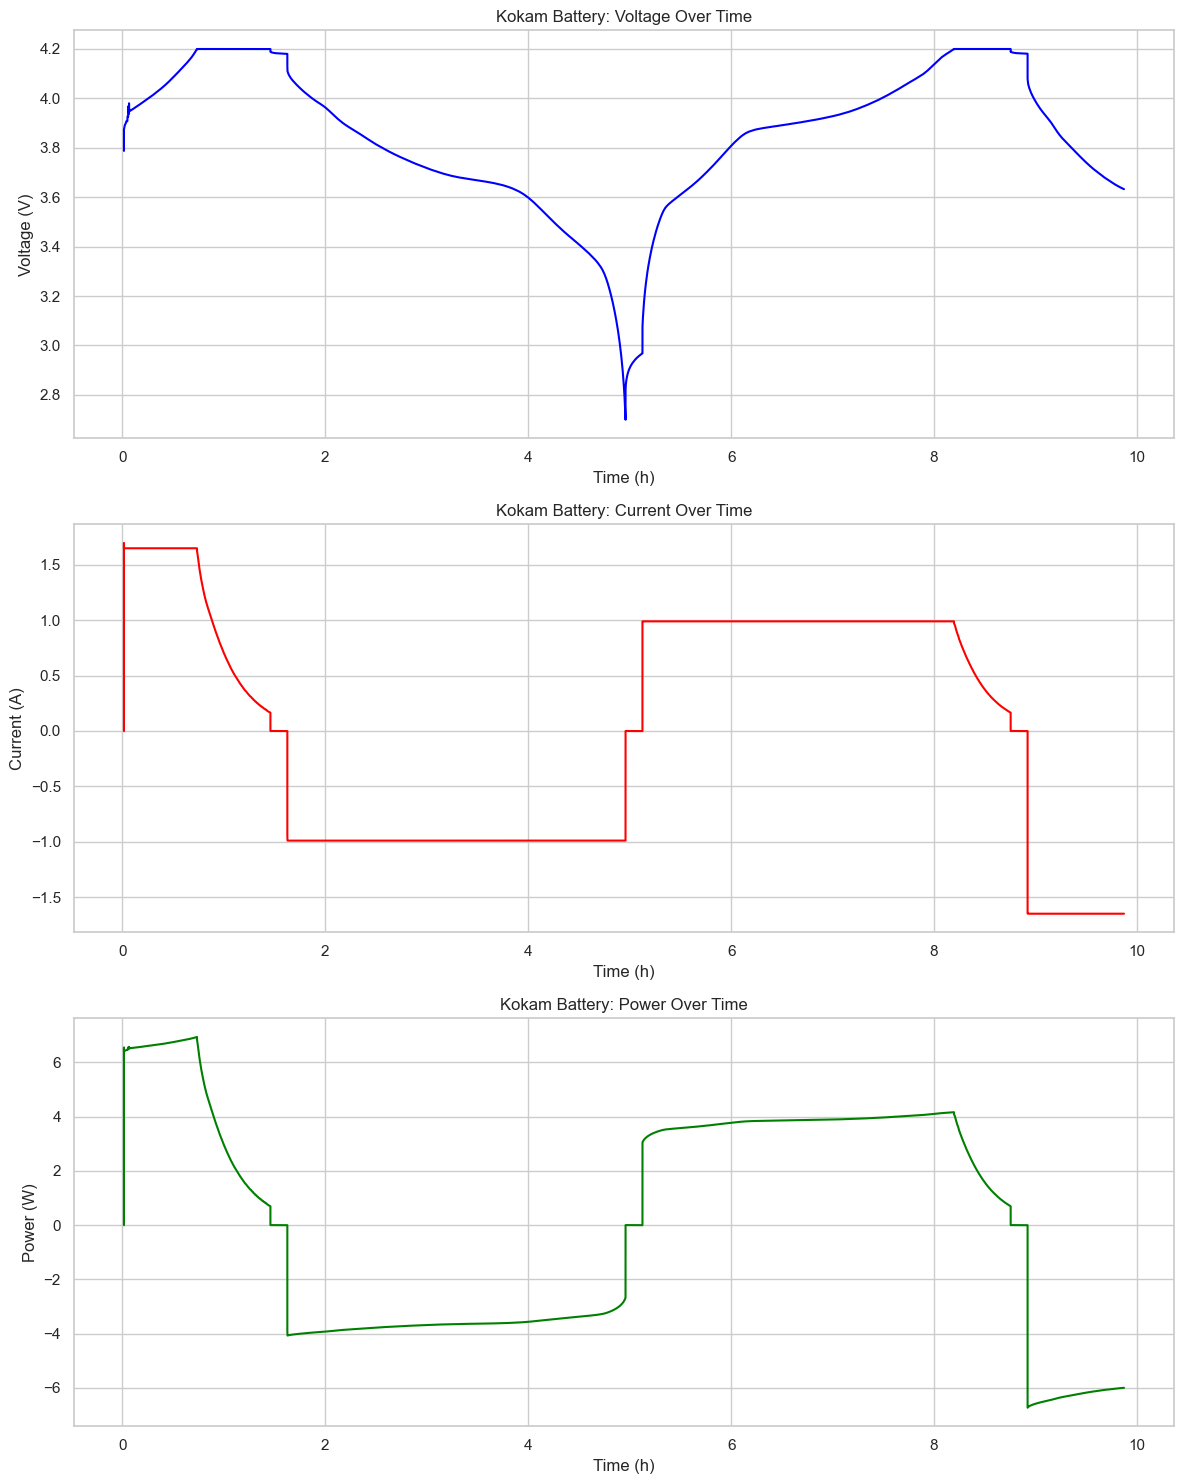

In [20]:
# Plot voltage, current and power for Kokam data
print("Analyzing Kokam Battery Data:")
plot_battery_parameters(kokam_data, 'Kokam Battery')

Analyzing Charge/Discharge Cycles for Kokam Battery:


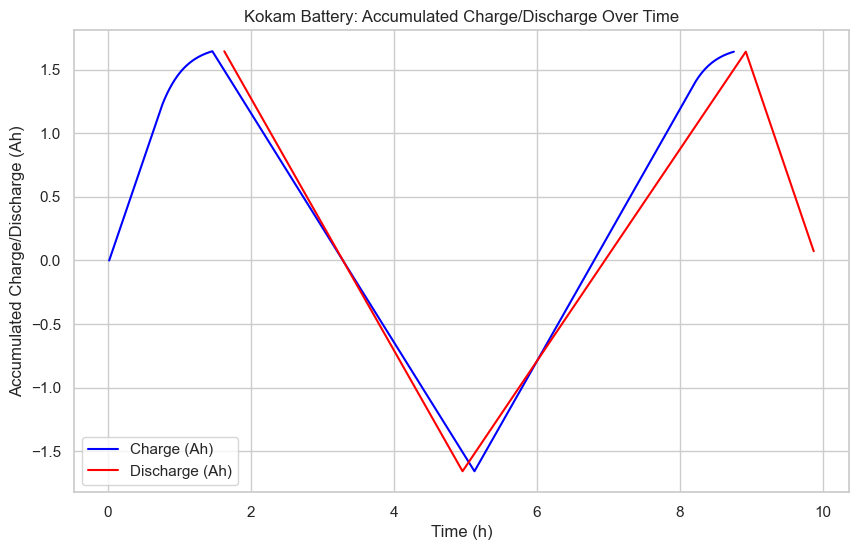

In [22]:
# Analyze charge/discharge cycles for Kokam
print("Analyzing Charge/Discharge Cycles for Kokam Battery:")
analyze_charge_cycles(kokam_data, 'Kokam Battery')

# LG Chem Battery

Analyzing LG Chem Battery Data:


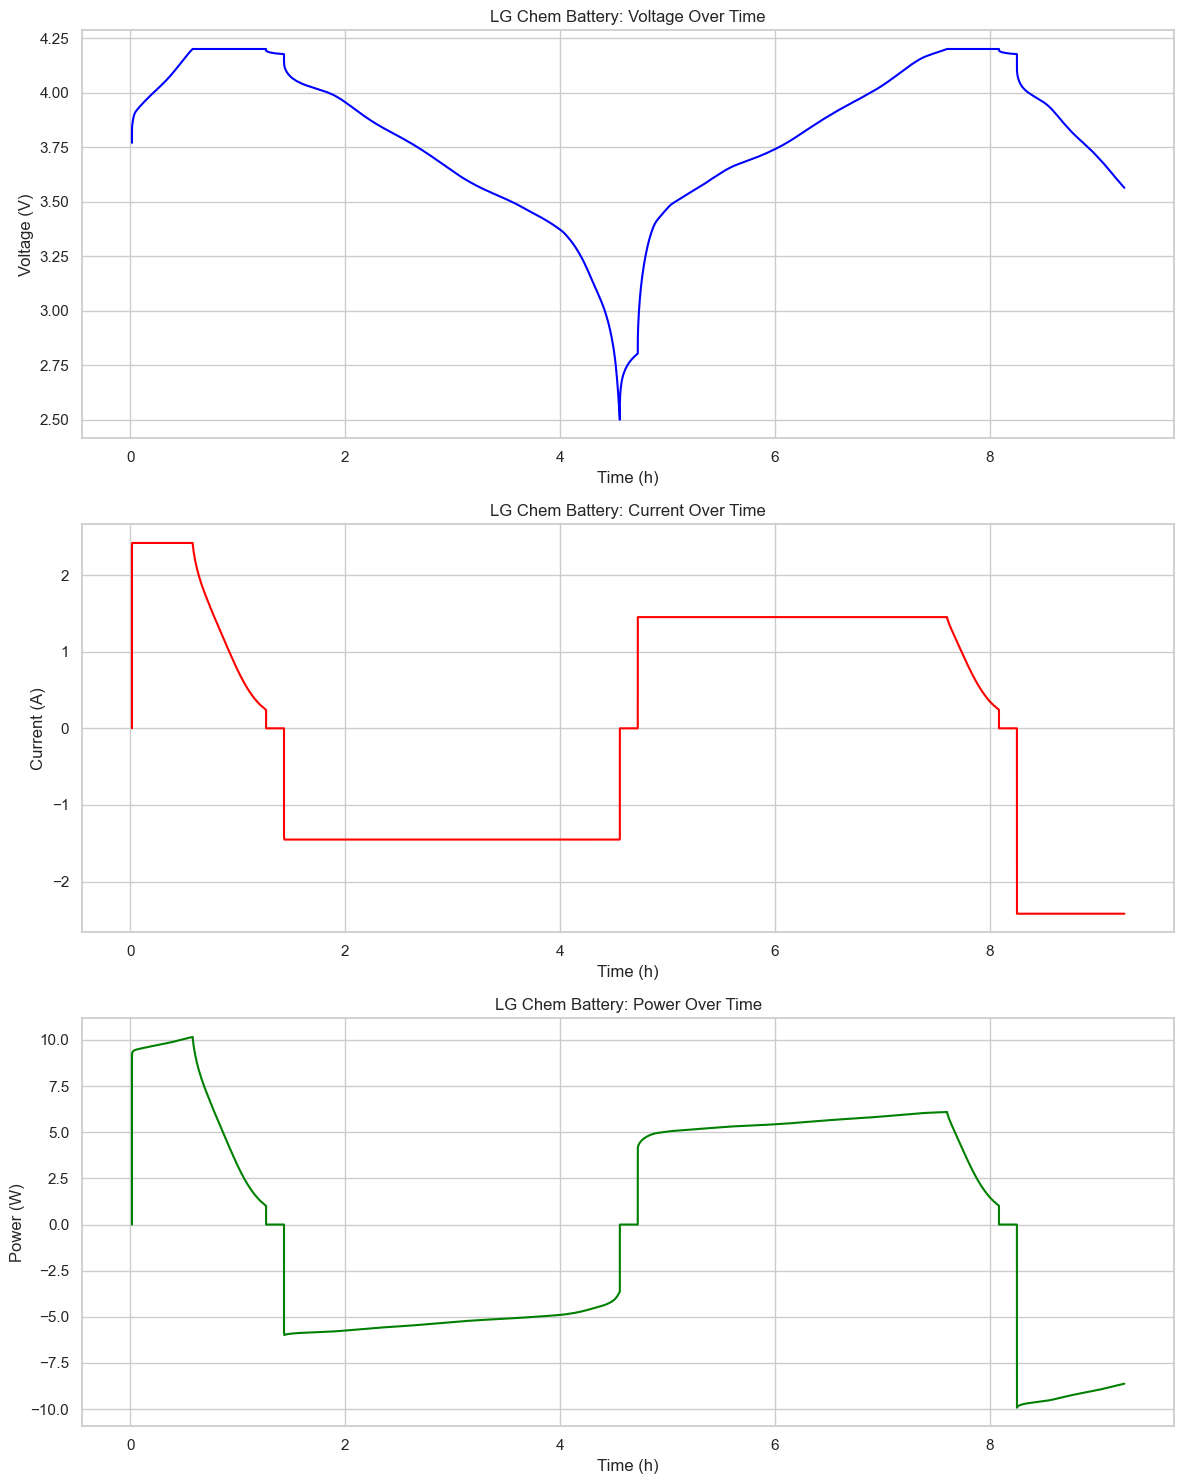

In [17]:
# Plot voltage, current and power for LG Chem data
print("Analyzing LG Chem Battery Data:")
plot_battery_parameters(lg_data, 'aLG Chem Battery')

Analyzing Charge/Discharge Cycles for LG Chem Battery:


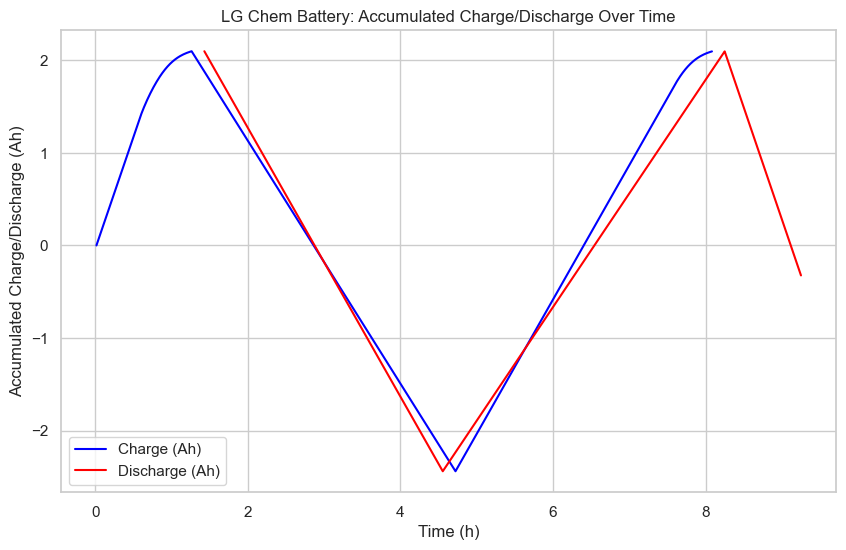

In [19]:
# Analyze charge/discharge cycles for LG
print("Analyzing Charge/Discharge Cycles for LG Chem Battery:")
analyze_charge_cycles(lg_data, 'LG Chem Battery')

# Degradation Analysis

Visualizing and Analyzing the degradation of battery capacity over multiple charge/discharge cycles helps in understanding how battery capacity changes over time and is crucial for predicting battery lifespan and performance.

Degradation Analysis for Kokam Battery:


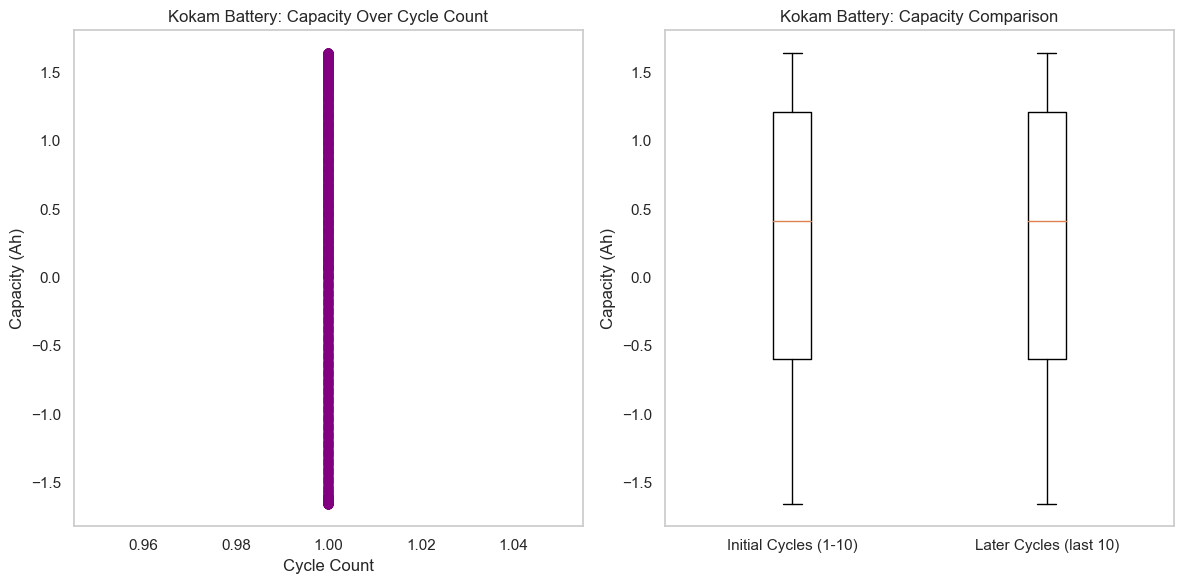

Degradation Analysis for LG Chem Battery:


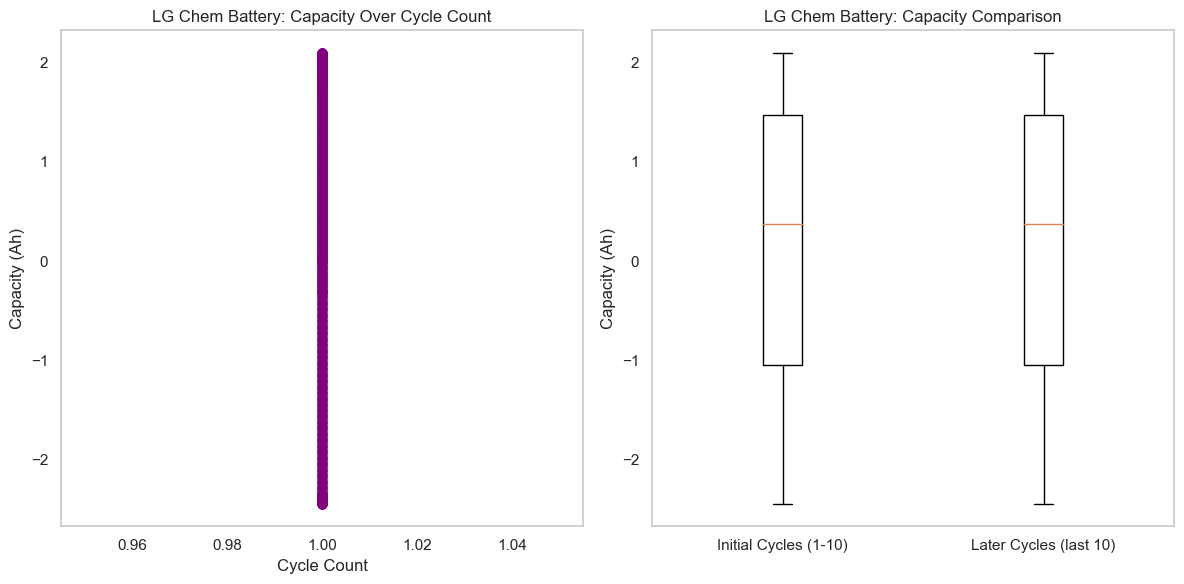

In [20]:
# Function to analyze and visualize degradation over cycles
def analyze_degradation(data, title):
    # Cycle Life Analysis: Plot capacity (Ah) over cycle count
    plt.figure(figsize=(12, 6))

    # Plot capacity over cycles
    plt.subplot(1, 2, 1)
    plt.plot(data['Cyc-Count'], data['Ah[Ah]'], marker='o', color='purple')
    plt.title(f'{title}: Capacity Over Cycle Count')
    plt.xlabel('Cycle Count')
    plt.ylabel('Capacity (Ah)')
    plt.grid()

    # Analyze charge/discharge trends
    initial_cycles = data[data['Cyc-Count'] <= 10]  # First 10 cycles
    later_cycles = data[data['Cyc-Count'] > data['Cyc-Count'].max() - 10]  # Last 10 cycles

    # Plot comparison of initial and later cycles
    plt.subplot(1, 2, 2)
    plt.boxplot([initial_cycles['Ah[Ah]'], later_cycles['Ah[Ah]']],
                labels=['Initial Cycles (1-10)', 'Later Cycles (last 10)'])
    plt.title(f'{title}: Capacity Comparison')
    plt.ylabel('Capacity (Ah)')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Analyze degradation for Kokam and LG Chem batteries
print("Degradation Analysis for Kokam Battery:")
analyze_degradation(kokam_data, 'Kokam Battery')

print("Degradation Analysis for LG Chem Battery:")
analyze_degradation(lg_data, 'LG Chem Battery')


# Correlation Analysis

The correlation matrix helps in identifying relationships between battery performance metrics (e.g., voltage, current, capacity) and is essential for feature selection in predictive modeling.

In [28]:
# Function to perform correlation analysis
def correlation_analysis(data, title):
    # Calculate the correlation matrix
    corr = data.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix for {title}')
    plt.show()

# Kokam Data

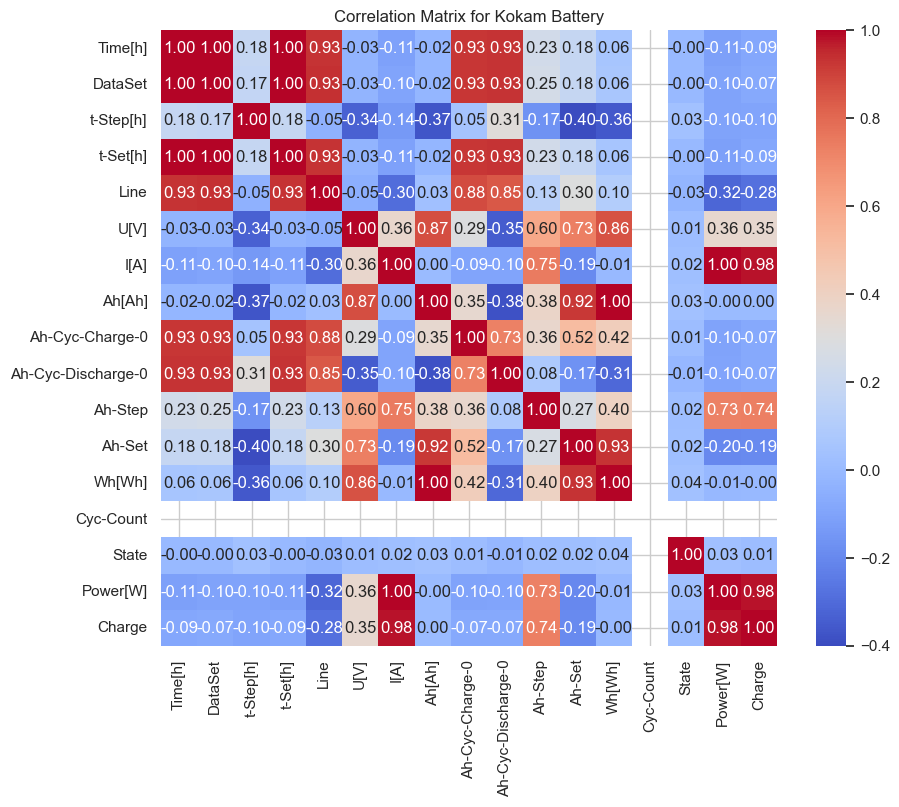

In [25]:
correlation_analysis(kokam_data, 'Kokam Battery')

# LG Chem Data

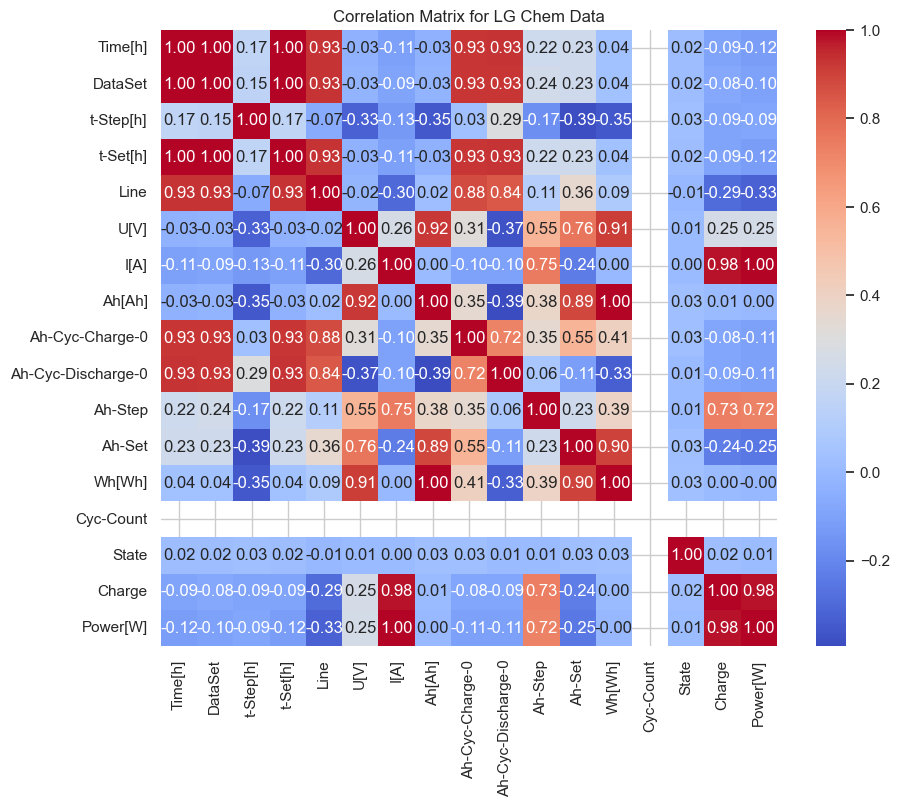

In [30]:
correlation_analysis(lg_data, 'LG Chem Data')